In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Note: colab has changed the tensorflow version from 27 March 2020
import pytz
import itertools
import os, fnmatch
import numpy as np
import pandas as pd
from itertools import cycle
from datetime import datetime
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from keras.optimizers import Adadelta
from keras.initializers import glorot_uniform

# Machine Learning
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score, auc

# Deep Learning
import tensorflow as tf
from keras import backend as K
from keras.optimizers import SGD
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import History, EarlyStopping, ModelCheckpoint, CSVLogger
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Add

# Signal Processing Parameters
fs = 44100           # Sampling Frequency
n_fft = 2048         # length of the FFT window
hop_length = 812     # Number of samples between successive frames
testset_size = 0.25  # Percentage of data for Testing

In [ ]:
# Note: Label 0 => Normal, 1 =>AS , 2 =>MR , 3 =>MS , 4 =>MVP

X = np.load('/content/drive/MyDrive/saved_arrays/X_cardio_dataset_1.npy')
y = np.load('/content/drive/MyDrive/saved_arrays/y_cardio_dataset_1.npy')

X = np.array(X).astype('float32')
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)
X, y = shuffle(X, y)

print(X.shape)
print(y.shape)

(1000, 1025, 120, 1)
(1000,)


In [ ]:
# labelling Information, the code of this cell is updated and not executed
print('Note:> Label 0 => Normal, 1 =>AS , 2 =>MR , 3 =>MS , 4 =>MVP \n')
unique_elements, counts_elements = np.unique(y, return_counts=True)
classes_array = np.asarray((unique_elements, counts_elements))
print(classes_array,'\n')
print("Total files are:", classes_array[1][0]+classes_array[1][1]+classes_array[1][2]+classes_array[1][3]+classes_array[1][4])

Note:> Label 0 => Normal, 1 =>AS , 2 =>MR , 3 =>MS , 4 =>MVP 

[[  0   1   2   3   4]
 [200 200 200 200 200]] 

Total files are: 1000


In [ ]:
# # building the mode
# def get_model():
#   model = Sequential()
#   model.add(Conv2D(32, kernel_size=5, strides=1, activation='relu', input_shape=(1025,55,1)))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D(pool_size=2, strides=2))
#   model.add(Dropout(0.25))

#   model.add(Conv2D(64, (5, 5), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.3))

#   model.add(Flatten())
#   model.add(Dense(128, activation='relu'))
#   model.add(Dropout(0.5))

#   model.add(Dense(5, activation='softmax'))
#   # model.summary()
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [ ]:
# # building the mode | recently used
# def get_model():
#   model = Sequential()
#   model.add(Conv2D(32,(5,5), activation='relu', strides=1, input_shape=(1025,55,1)))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#   model.add(Dropout(0.25))

#   model.add(Conv2D(64,(3,3), activation='relu'))
#   # model.add(BatchNormalization())
#   model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#   model.add(Dropout(0.25))

#   model.add(Conv2D(128,(3,3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#   model.add(Dropout(0.3))

#   model.add(Flatten())
#   model.add(Dense(256, activation="relu"))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Dense(5, activation="softmax"))

#   # model.summary()
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [ ]:
# def get_model():
# 	kernel = (3, 3)
# 	first_conv  = 32
# 	second_conv = first_conv * 2
# 	third_conv  = second_conv * 2

# 	model = Sequential()
# 	model.add(Conv2D(first_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(1025,55,1)))
# 	model.add(BatchNormalization())
	
# 	model.add(Conv2D(first_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same'))
# 	model.add(BatchNormalization())
# 	model.add(MaxPooling2D((2, 2)))
	
# 	model.add(Dropout(0.2))
# 	model.add(Conv2D(second_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same'))
# 	model.add(BatchNormalization())
	
# 	model.add(Conv2D(second_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same'))
# 	model.add(BatchNormalization())
# 	model.add(MaxPooling2D((2, 2)))
	
# 	model.add(Dropout(0.3))
# 	model.add(Conv2D(third_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same'))
# 	model.add(BatchNormalization())
	
# 	model.add(Conv2D(third_conv, kernel, activation='tanh', kernel_initializer='he_uniform', padding='same'))
# 	model.add(BatchNormalization())
# 	model.add(MaxPooling2D((2, 2)))
	
# 	model.add(Dropout(0.4))
# 	model.add(Flatten())
 
# 	model.add(Dense(third_conv, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(BatchNormalization())
 
# 	model.add(Dropout(0.5))
# 	model.add(Dense(5, activation='softmax'))
 
# 	# compile model
# 	opt = SGD(lr=0.001, momentum=0.9)
# 	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# 	# model.summary()
# 	return model

In [ ]:
# from keras import backend as keras_backend
# from keras.models import Sequential, load_model
# from keras.layers import Dense, Dropout, Flatten, LeakyReLU, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
# from keras.optimizers import Adam
# from keras.utils import np_utils, to_categorical, plot_model
# from keras.regularizers import l2

# def get_model(spatial_dropout_rate_1=0, spatial_dropout_rate_2=0, l2_rate=0):
#   # Regularization rates
#   spatial_dropout_rate_1 = 0.07
#   spatial_dropout_rate_2 = 0.14
#   l2_rate = 0.0005

#   # Create a secquential object
#   model = Sequential()
  
#   # Conv 1
#   model.add(Conv2D(filters=32,  kernel_size=(3, 3),  kernel_regularizer=l2(l2_rate), input_shape=(1025,55,1)))
#   model.add(LeakyReLU(alpha=0.1))
#   model.add(BatchNormalization())

#   model.add(SpatialDropout2D(spatial_dropout_rate_1))
#   model.add(Conv2D(filters=32, kernel_size=(3, 3), kernel_regularizer=l2(l2_rate)))
#   model.add(LeakyReLU(alpha=0.1))
#   model.add(BatchNormalization())

#   # Max Pooling #1
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(SpatialDropout2D(spatial_dropout_rate_1))
#   model.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(l2_rate)))
#   model.add(LeakyReLU(alpha=0.1))
#   model.add(BatchNormalization())
  
#   model.add(SpatialDropout2D(spatial_dropout_rate_2))
#   model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_regularizer=l2(l2_rate)))
#   model.add(LeakyReLU(alpha=0.1))
#   model.add(BatchNormalization())
  
#   # Reduces each h×w feature map to a single number by taking the average of all h,w values.
#   model.add(GlobalAveragePooling2D())
#   # Softmax output
#   model.add(Dense(5, activation='softmax'))
#   adam = Adam(lr=1e-4, beta_1=0.99, beta_2=0.999)
#   model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
#   return model

In [ ]:
# ResNet
img_rows, img_cols = 1025, 120
input_shape = (img_rows, img_cols, 1)

input1 = Input(shape=(1025,120,1))
# Resuidal block BN -> relu -> conv -> bn -> relu -> conv
def res_block(x, filters):
  bn1 = BatchNormalization()(x)
  act1 = Activation('relu')(bn1)
  conv1 = Conv2D(filters=filters, kernel_size=(3, 3), data_format='channels_first', strides=(2, 2), padding='same', 
                  kernel_initializer=glorot_uniform(seed=0))(act1)
  # print('conv1.shape', conv1.shape)
  bn2 = BatchNormalization()(conv1)
  act2 = Activation('relu')(bn2)
  conv2 = Conv2D(filters=filters, kernel_size=(3, 3), data_format='channels_first', strides=(1, 1), padding='same', 
                  kernel_initializer=glorot_uniform(seed=0))(act2)
  # print('conv2.shape', conv2.shape)
  residual = Conv2D(1, (1, 1), strides=(1, 1), data_format='channels_first')(conv2)
  x = Conv2D(filters=filters, kernel_size=(3, 3), data_format='channels_first', strides=(2, 2), padding='same', 
                  kernel_initializer=glorot_uniform(seed=0))(x)
  # print('x.shape', x.shape)
  out = Add()([x, residual])
  return out

def get_model():
  # Combining resuidal blocks into a network
  res1 = res_block(input1, 64)
  # print('---------block 1 end-----------')
  res2 = res_block(res1, 128)
  # print('---------block 2 end-----------')
  res3 = res_block(res2, 256)
  # print('---------block 3 end-----------')
  res4 = res_block(res3, 512)
  # print('---------block 4 end-----------')

  # Classifier block
  act1 = Activation('relu')(res4)
  flatten1 = Flatten()(act1)
  dense1 = Dense(512)(flatten1)
  act2 = Activation('relu')(dense1)
  dense2 = Dense(5)(act2)
  output1 = Activation('softmax')(dense2)
  model = Model(inputs=input1, outputs=output1)

  # Compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.01), metrics=['accuracy'])
  return model
  # model.summary()
  # plot_model(model, to_file='model.png')
  # SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
# # InceptionNet pre-build

# def get_model():
#   mode = tf.keras.applications.InceptionV3(include_top=True, weights=None, input_tensor=None,input_shape=None, pooling=None, classes=5,
#     classifier_activation='softmax')
#   model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.01), metrics=['accuracy'])
#   return model

In [ ]:
model = get_model()

In [ ]:
# confusion matrix drawing for each fold

def data_labelling(intLabel):
  Y = []
  length = len(intLabel)
  for i in range(length):
    if intLabel[i] == 0:
      Y.append("Normal")
    elif intLabel[i] == 1:
      Y.append("AS")
    elif intLabel[i] == 2:
      Y.append("MR")
    elif intLabel[i] == 3:
      Y.append("MS")
    elif intLabel[i] == 4:
      Y.append("MVP")
  return Y

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    path = '/content/drive/My Drive/saveData/cardio/dataset1/cnf_mat'
    if not os.path.exists(path):
      os.makedirs(path)
    plt.savefig(path+'/'+title+'.png', bbox_inches='tight')

def cnf_matrix_for_each_fold(model, testX, testY, fold_no):
  y_pred = model.predict(testX)
  y_pred = np.rint(y_pred.argmax(axis=1))
  y_pred = y_pred.tolist()
  testY = np.rint(testY)
  testY = testY.tolist()

  y_true = data_labelling(testY)
  y_predicted = data_labelling(y_pred)

  cnf_matrix = confusion_matrix(y_true, y_predicted, labels=['Normal', 'AS', 'MR', 'MS', 'MVP'])
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Normal', 'AS', 'MR', 'MS', 'MVP'], title='Confusion matrix for fold No._'+ str(fold_no))

In [ ]:
# Plotting and estimation of FPR, TPR for ROC

def draw_roc(model, X_test, y_test, fold_no):
  y_pred = model.predict(X_test)
  y_true = y_test
  y_true = y_true.astype(int)
  n_classes = y_test.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['green', 'red'])
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  for i, color in zip(range(n_classes), colors):
      name = ['Normal', 'AS', 'MR', 'MS', 'MVP']
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='{0} (Area under the curve =  {1:0.4f})' ''.format(name[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k-', linestyle='--', lw=1.5)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic (ROC) curve for fold number '+ str(fold_no))
  plt.legend(loc="lower right")
  path = '/content/drive/My Drive/saveData/cardio/dataset1/ROC'
  if not os.path.exists(path):
    os.makedirs(path)
  plt.savefig(path+'/'+'ROC for fold no.'+str(fold_no)+'.png', bbox_inches='tight')
  plt.show()

  return fpr, tpr, roc_auc

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 00047: early stopping
Score for fold 1: loss of 0.305680513381958; accuracy of 88.99999856948853% and training_loss: 0.2065109759569168; traing_acc: 91.44444465637207%
fold 1 training time is 0:01:01.089950
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

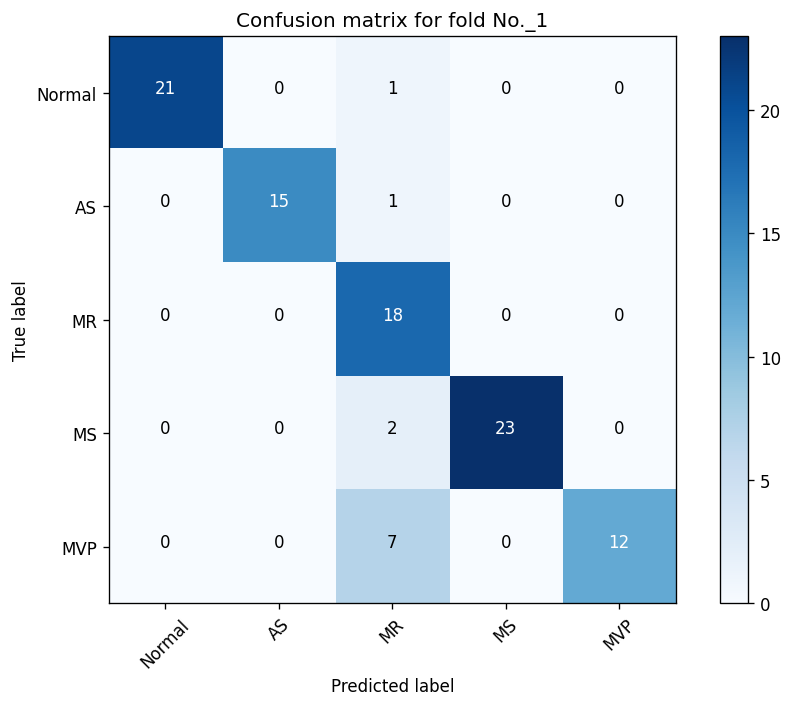

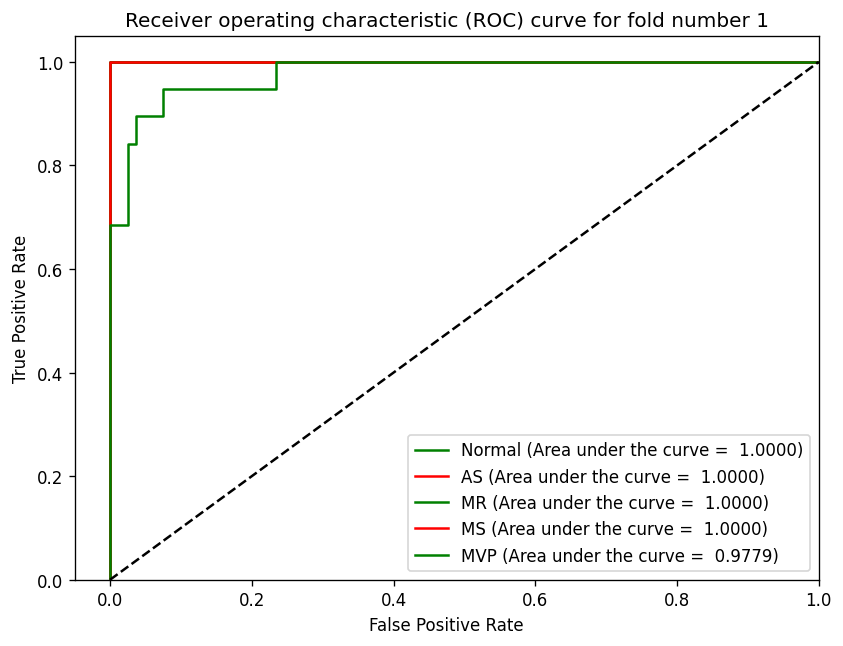

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 00048: early stopping
Score for fold 2: loss of 0.058779966086149216; accuracy of 97.00000286102295% and training_loss: 0.008144520223140717; traing_acc: 100.0%
fold 2 training time is 0:01:06.253047
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

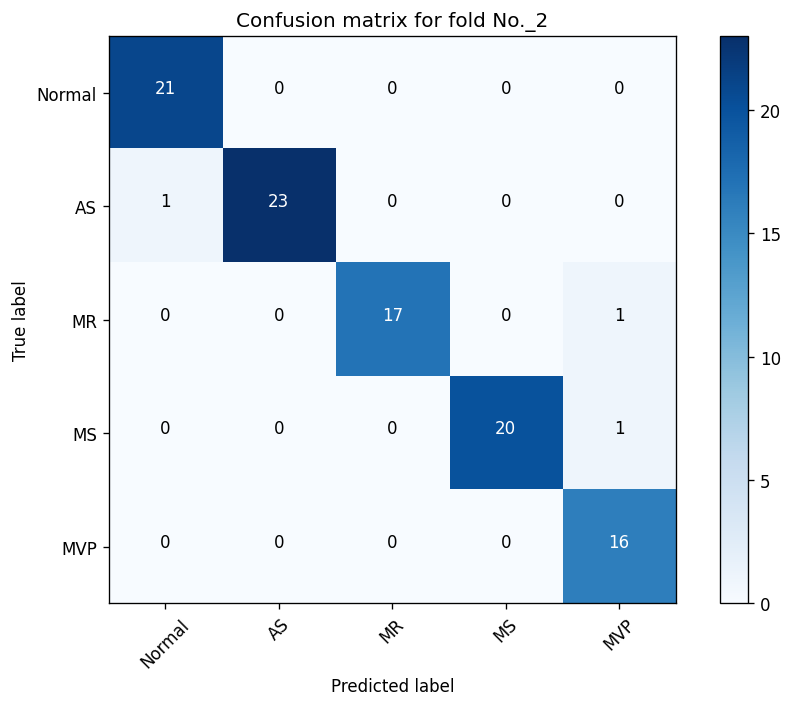

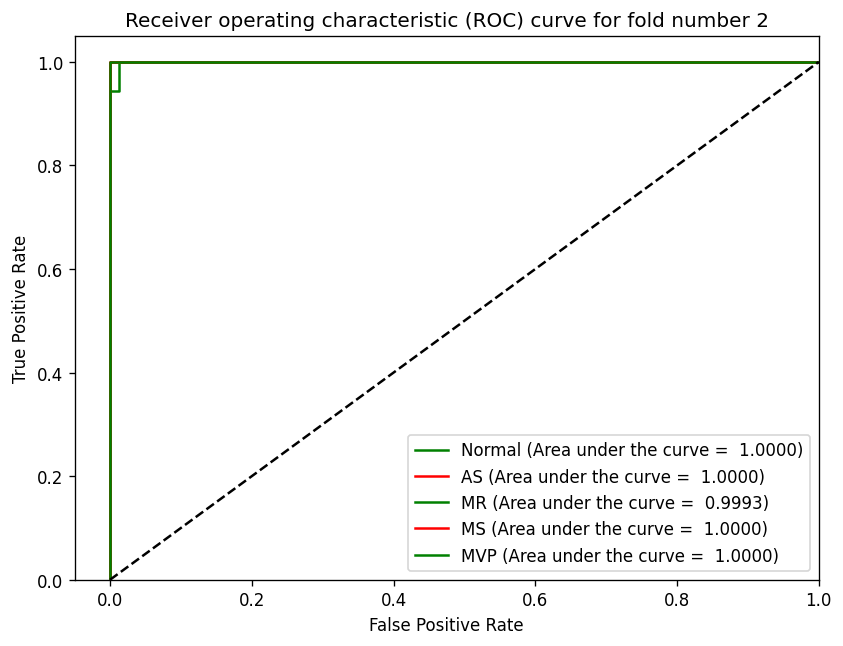

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 00050: early stopping
Score for fold 3: loss of 0.03115597739815712; accuracy of 99.00000095367432% and training_loss: 0.011599499732255936; traing_acc: 99.8888909816742%
fold 3 training time is 0:01:10.887386
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

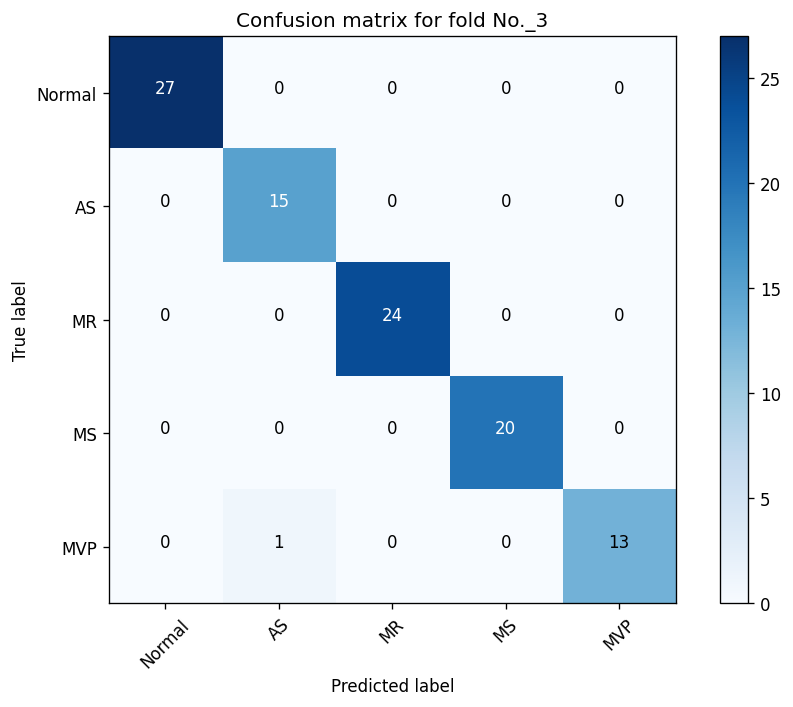

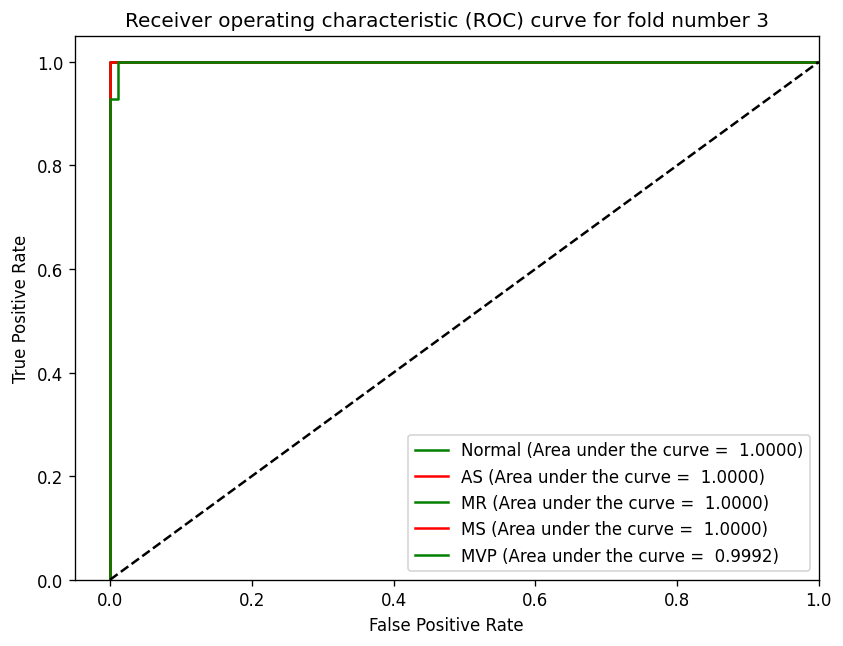

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 00077: early stopping
Score for fold 4: loss of 0.01363290287554264; accuracy of 99.00000095367432% and training_loss: 0.0020672681275755167; traing_acc: 100.0%
fold 4 training time is 0:01:36.226558
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

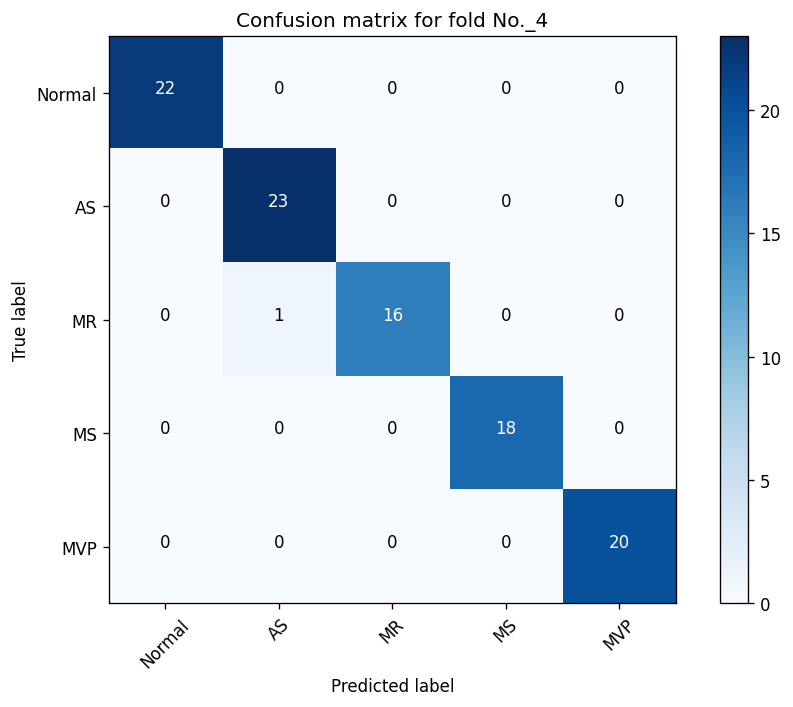

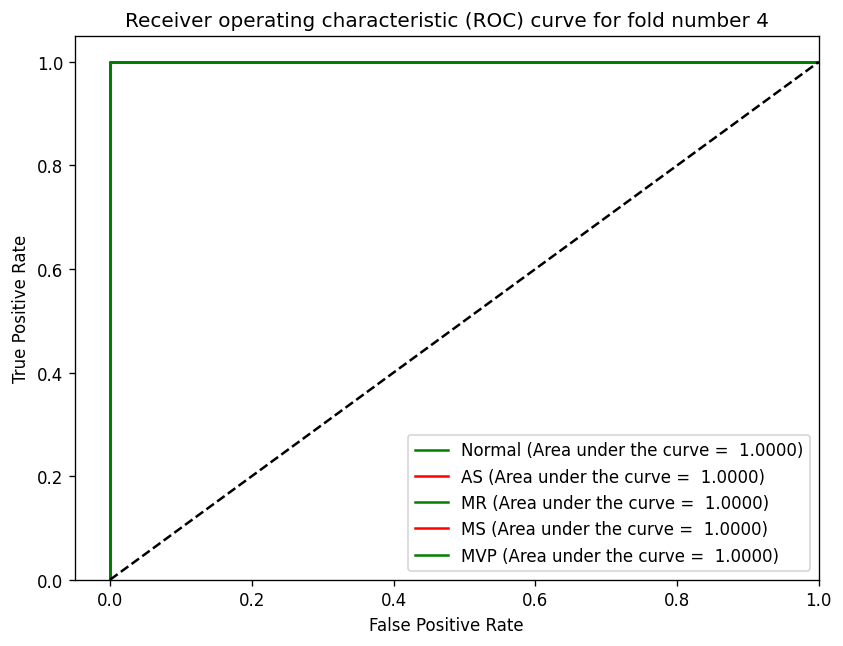

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 00065: early stopping
Score for fold 5: loss of 0.01228800043463707; accuracy of 99.00000095367432% and training_loss: 0.0028341489378362894; traing_acc: 100.0%
fold 5 training time is 0:01:28.379838
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

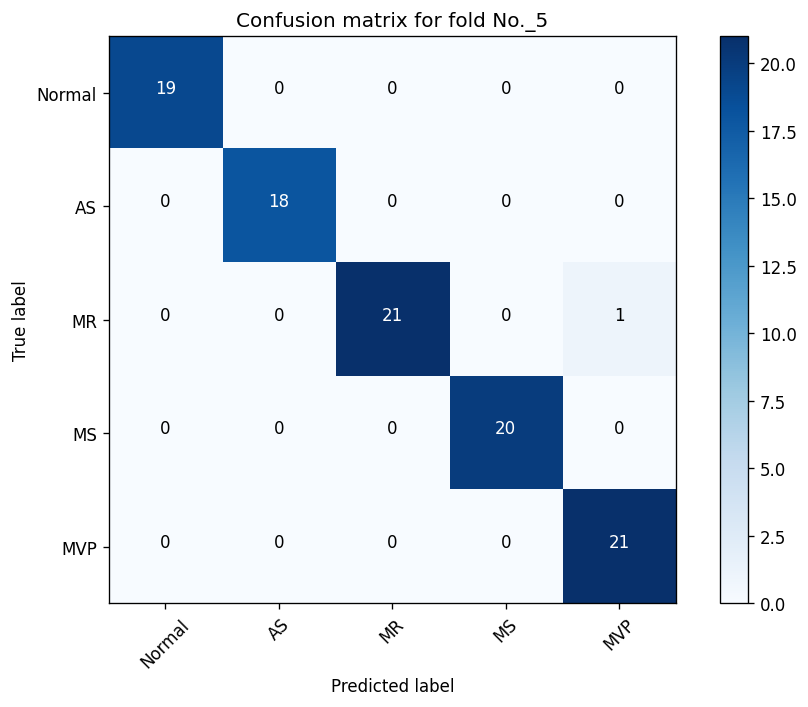

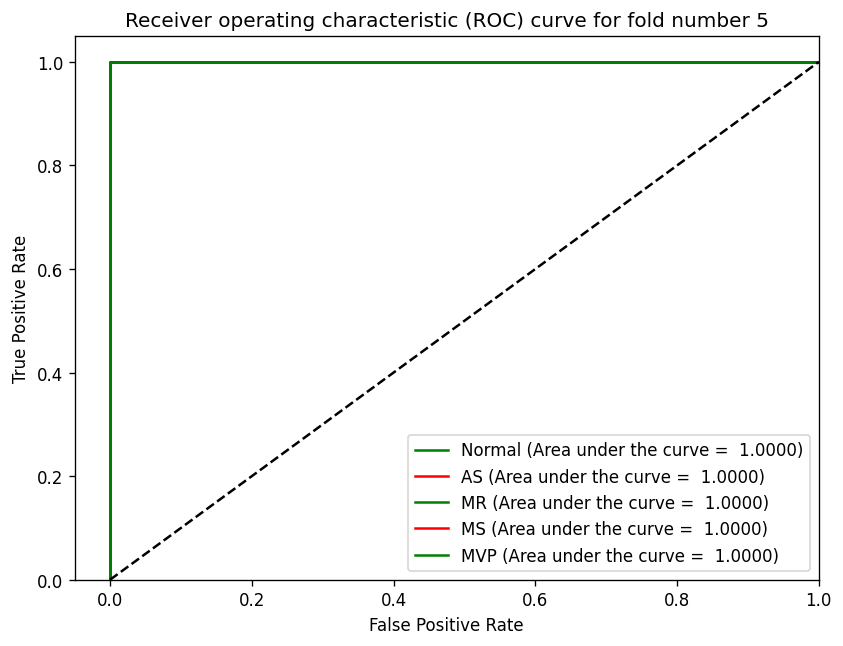

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 00058: early stopping
Score for fold 6: loss of 0.1450677067041397; accuracy of 92.00000166893005% and training_loss: 0.10946573317050934; traing_acc: 95.55555582046509%
fold 6 training time is 0:01:15.656387
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

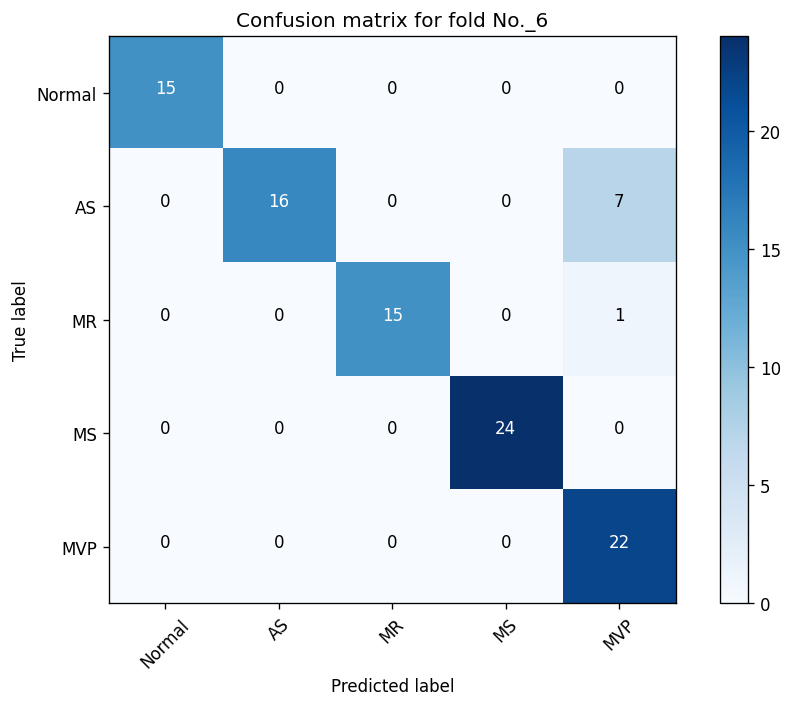

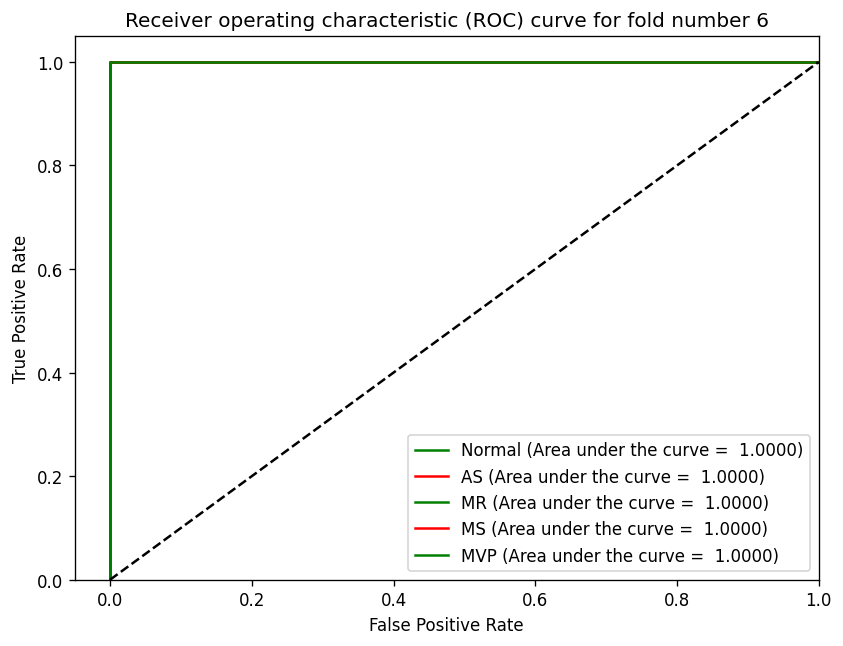

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 00084: early stopping
Score for fold 7: loss of 0.06683425605297089; accuracy of 98.00000190734863% and training_loss: 0.0014736826997250319; traing_acc: 100.0%
fold 7 training time is 0:01:45.821782
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

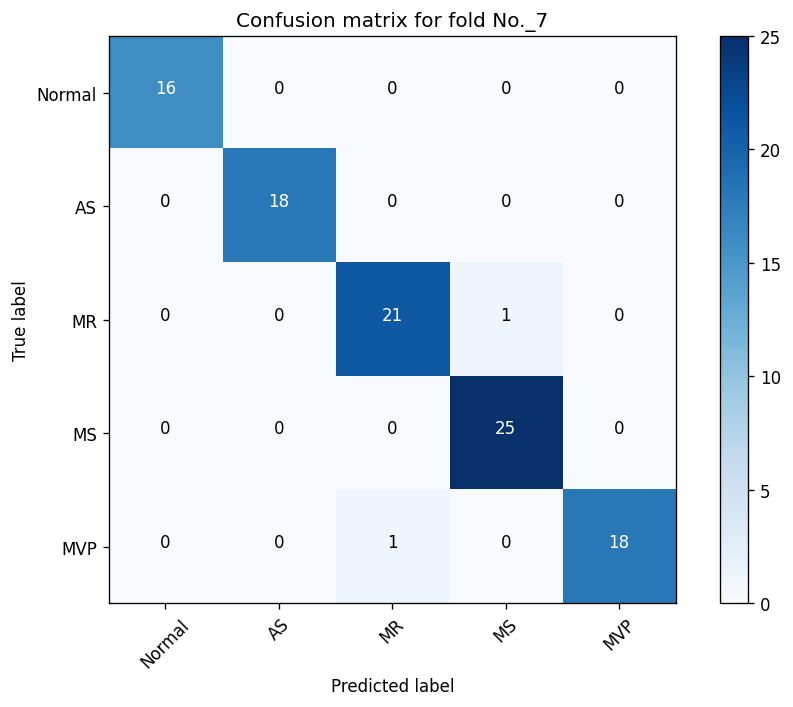

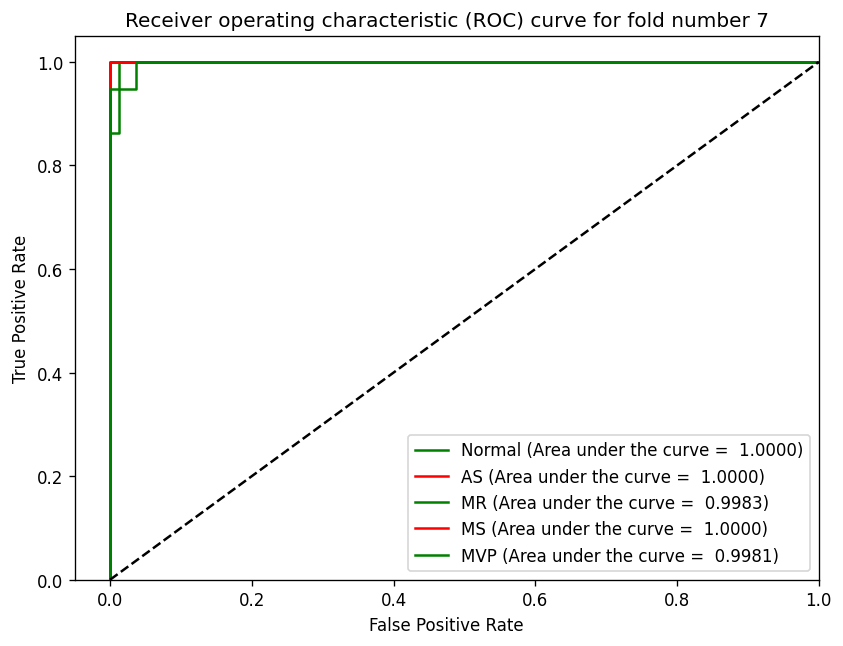

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 00073: early stopping
Score for fold 8: loss of 0.06546502560377121; accuracy of 98.00000190734863% and training_loss: 0.0030866521410644054; traing_acc: 100.0%
fold 8 training time is 0:01:32.766005
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

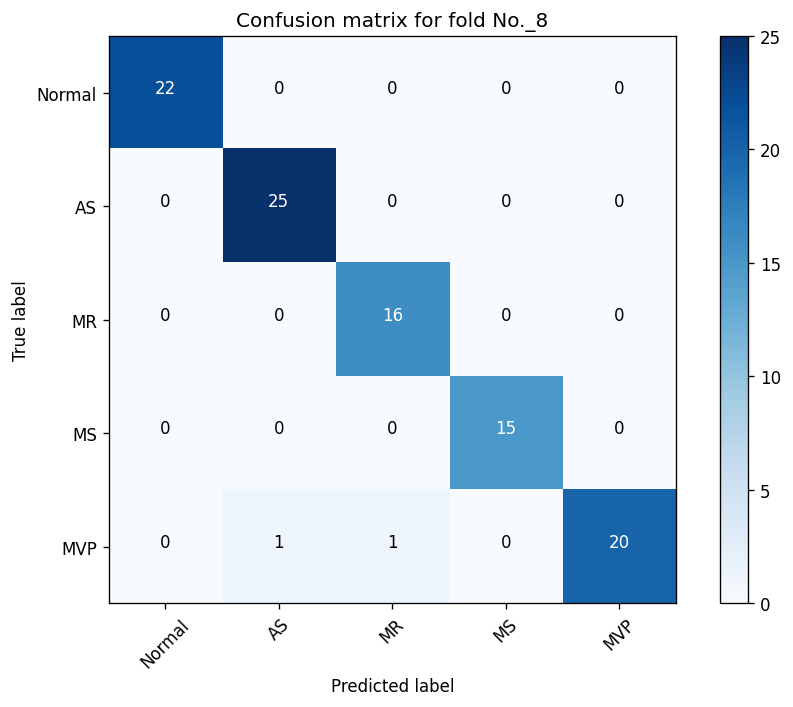

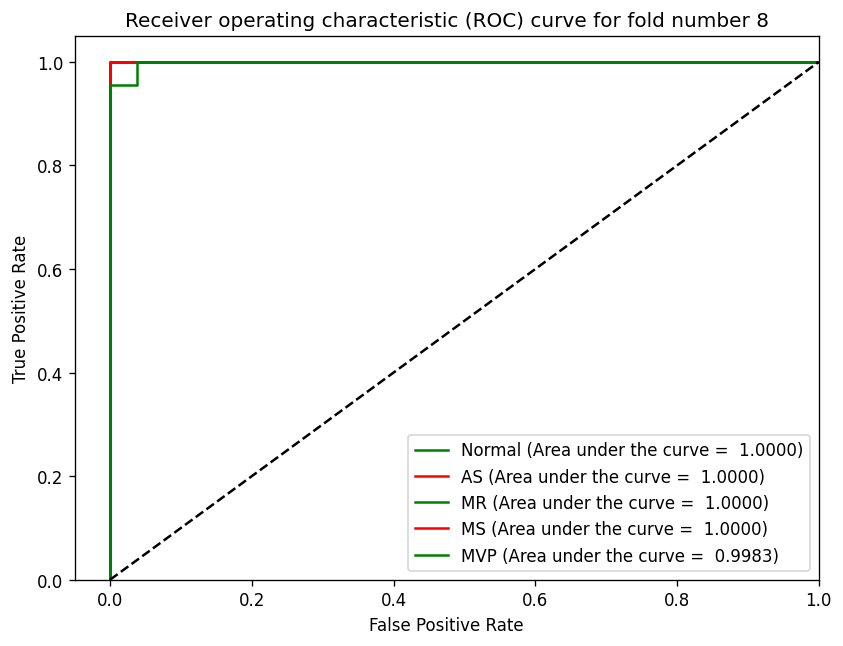

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 00040: early stopping
Score for fold 9: loss of 0.10635165870189667; accuracy of 98.00000190734863% and training_loss: 0.01490113977342844; traing_acc: 99.8888909816742%
fold 9 training time is 0:00:59.896270
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

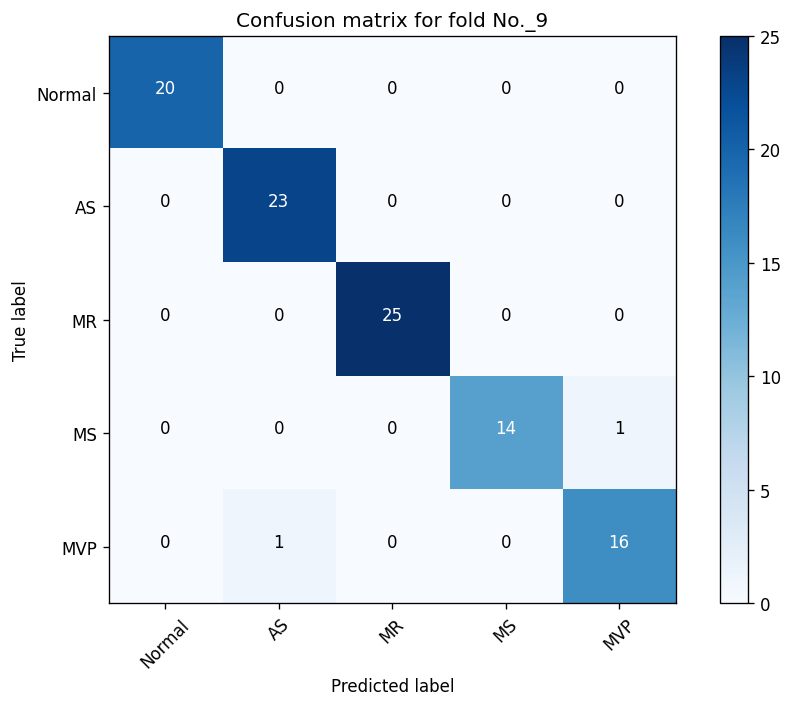

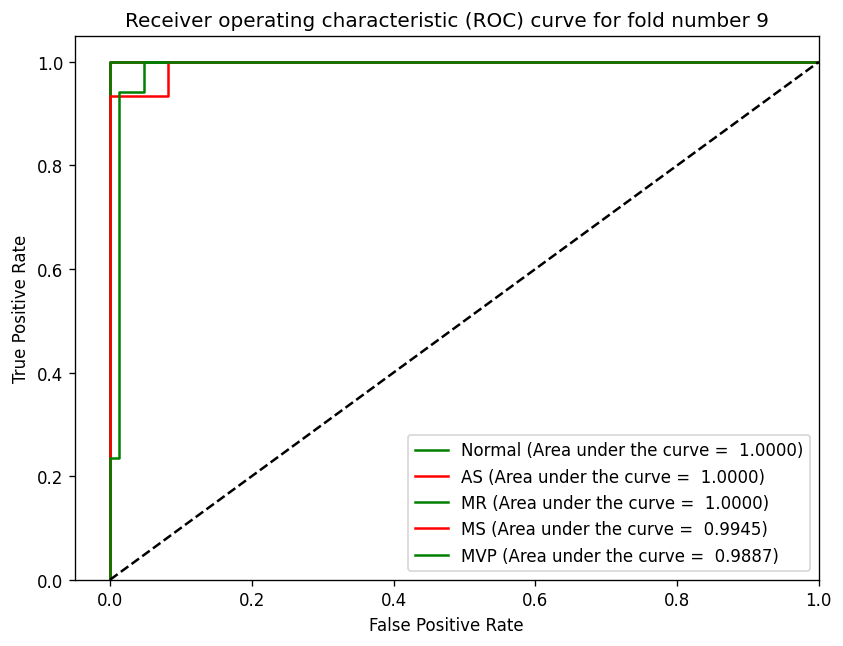

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 00055: early stopping
Score for fold 10: loss of 0.0926491990685463; accuracy of 98.00000190734863% and training_loss: 0.010829130187630653; traing_acc: 100.0%
fold 10 training time is 0:01:12.583257
Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

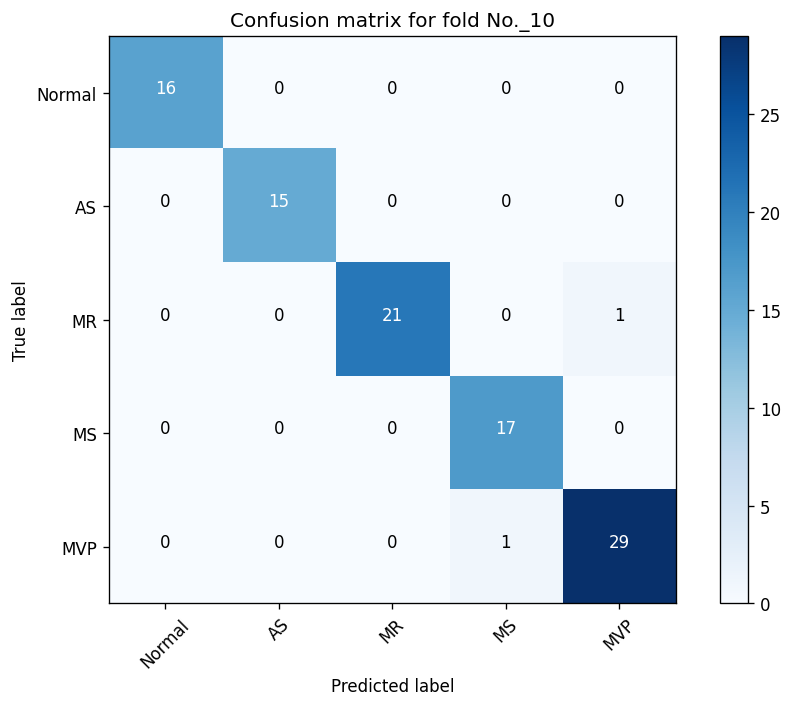

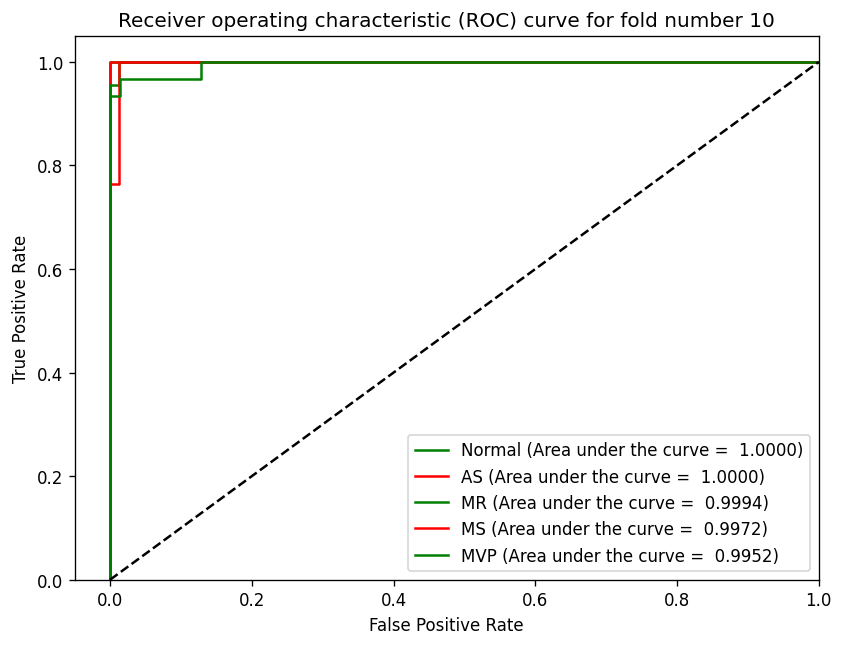

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.305680513381958 - Accuracy: 88.99999856948853% - Training_Loss: 0.2065109759569168 - Training_Acc: 91.44444465637207%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.058779966086149216 - Accuracy: 97.00000286102295% - Training_Loss: 0.008144520223140717 - Training_Acc: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.03115597739815712 - Accuracy: 99.00000095367432% - Training_Loss: 0.011599499732255936 - Training_Acc: 99.8888909816742%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.01363290287554264 - Accuracy: 99.00000095367432% - Training_Loss: 0.0020672681275755167 - Training_Acc: 100.0%
------------------------------------------------------------------------
> Fold 5 -

In [ ]:
# K-fold cross validation code, Updated 

batch_size = 32
no_epochs = 500
num_folds = 10
fold_no = 1

# Define per-fold score containers
acc_per_fold  = []
loss_per_fold = []
train_acc_per_fold  = []
train_loss_per_fold = []
history_all_fold    = []
FPR, TPR, AUC = [], [], []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

last_fold_time = start = datetime.now()
for train, test in kfold.split(X, y):
  model = get_model()

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # time_stamp = datetime.now(pytz.timezone('Asia/Calcutta')).strftime("%m/%d/%Y, %H:%M:%S").replace(" ", "").replace("/", "-").replace(":", "-").replace(",", "_")
  path = '/content/drive/My Drive/saveData/cardio/dataset1/models'
  if not os.path.exists(path):
    os.makedirs(path)
  modelPathSave = f'{path}/dataset1_fold_{fold_no}.hdf5'
  path = '/content/drive/My Drive/saveData/cardio/dataset1/csv'
  if not os.path.exists(path):
    os.makedirs(path)
  pathToSaveCSV = f'{path}/dataset1_fold_{fold_no}.csv'
  checkpoint = ModelCheckpoint(modelPathSave, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
  early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
  csv_logger = CSVLogger(pathToSaveCSV, append=False, separator=',')

  steps = int(X[train].shape[0] / batch_size)
  history = model.fit(
              X[train], to_categorical(LabelEncoder().fit_transform(y[train])),
              batch_size= batch_size,
              epochs= no_epochs,
              callbacks = [checkpoint, csv_logger, early_stop],
              validation_data = (X[test], to_categorical(LabelEncoder().fit_transform(y[test]))),
              use_multiprocessing = True, 
              # steps_per_epoch = steps,
              verbose=0)

  # Generate generalization metrics
  train_scores = model.evaluate(X[train], to_categorical(LabelEncoder().fit_transform(y[train])), verbose=0)
  val_scores   = model.evaluate(X[test], to_categorical(LabelEncoder().fit_transform(y[test])), verbose=0)

  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {val_scores[0]}; {model.metrics_names[1]} of {val_scores[1]*100}% and training_loss: {train_scores[0]}; traing_acc: {train_scores[1]*100}%')
  print(f'fold {fold_no} training time is {datetime.now() - last_fold_time}')
  last_fold_time = datetime.now()

  train_acc_per_fold.append(train_scores[1]*100)
  train_loss_per_fold.append(train_scores[0])
  acc_per_fold.append(val_scores[1] * 100)
  loss_per_fold.append(val_scores[0])
  history_all_fold.append(history.history)

  # drawing and saving confusion matrix and ROC_AUC data
  cnf_matrix_for_each_fold(model, X[test], y[test], fold_no)
  fpr, tpr, roc = draw_roc(model, X[test], to_categorical(LabelEncoder().fit_transform(y[test])), fold_no)
  FPR.append(fpr)
  TPR.append(tpr)
  AUC.append(roc)
  fold_no = fold_no + 1

duration = datetime.now() - start
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Training_Loss: {train_loss_per_fold[i]} - Training_Acc: {train_acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Training Accuracy: {np.mean(train_acc_per_fold)} (+- {np.std(train_acc_per_fold)})')
print(f'> Training Loss: {np.mean(train_loss_per_fold)}')
print(f'> Validation Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Validation Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
print("Training completed in time: ", duration)

In [ ]:
# save the data for average ROC curve for all fold 
path_roc = '/content/drive/My Drive/saveData/cardio/dataset1/ROC'

np.save(path_roc+'/FPR.npy', FPR)
np.save(path_roc+'/TPR.npy', TPR)
np.save(path_roc+'/AUC.npy', AUC)

In [ ]:
# loading the ROC data
path_roc = '/content/drive/My Drive/saveData/cardio/dataset1/ROC'

FPR = np.load(path_roc+'/FPR.npy', allow_pickle=True)
TPR = np.load(path_roc+'/TPR.npy', allow_pickle=True)
AUC = np.load(path_roc+'/AUC.npy', allow_pickle=True)

In [ ]:
FPR.shape[0]

10

In [ ]:
FPR

array([{0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0., 0., 0., 1.]), 3: array([0., 0., 0., 1.]), 4: array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.07, 0.07, 0.23, 0.23,
       1.  ])},
       {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0.  , 0.  , 0.  , 0.01, 0.01, 1.  ]), 3: array([0., 0., 0., 1.]), 4: array([0., 0., 0., 1.])},
       {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0., 0., 0., 1.]), 3: array([0., 0., 0., 1.]), 4: array([0.  , 0.  , 0.  , 0.01, 0.01, 1.  ])},
       {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0., 0., 0., 1.]), 3: array([0., 0., 0., 1.]), 4: array([0., 0., 0., 1.])},
       {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 0., 0., 1.]), 2: array([0., 0., 0., 0., 0., 1.]), 3: array([0., 0., 0., 1.]), 4: array([0., 0., 0., 1.])},
       {0: array([0., 0., 0., 1.]), 1: array([0., 0., 0., 1.]), 2: array([0., 0., 0., 1.]), 3: array([0., 0., 0., 1.]), 4: array([0., 0.

In [ ]:
FPR_list = []
for fpr in FPR:
  print(type(fpr))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [ ]:
# import csv
# csv_columns = ['class','fpr']
# csv_file = "fold_0.csv"
# try:
#     with open(csv_file, 'w') as csvfile:
#         writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
#         writer.writeheader()
#         for data in FPR[0]:
#             writer.writerow(data)
# except IOError:
#     print("I/O error")

In [ ]:
# traning and validation set sizes and respective healthy and dysphasia number of samples in each set

print(X.shape)
print(y.shape)

# K-fold cross validation code, Updated 
fold_no = 1
kfold = KFold(n_splits=num_folds, shuffle=True)

for train, test in kfold.split(X, y):
  print(f'fold {fold_no} training fold shape {train.shape} Validation fold shape {test.shape}')
  fold_no +=1

(1000, 1025, 120, 1)
(1000,)
fold 1 training fold shape (900,) Validation fold shape (100,)
fold 2 training fold shape (900,) Validation fold shape (100,)
fold 3 training fold shape (900,) Validation fold shape (100,)
fold 4 training fold shape (900,) Validation fold shape (100,)
fold 5 training fold shape (900,) Validation fold shape (100,)
fold 6 training fold shape (900,) Validation fold shape (100,)
fold 7 training fold shape (900,) Validation fold shape (100,)
fold 8 training fold shape (900,) Validation fold shape (100,)
fold 9 training fold shape (900,) Validation fold shape (100,)
fold 10 training fold shape (900,) Validation fold shape (100,)


**Saving Data for future time saving**

In [ ]:
# saving the data 
path_hist = '/content/drive/My Drive/saveData/cardio/dataset1/numpy_data/history'
if not os.path.exists(path_hist):
  os.makedirs(path_hist)

np.save(path_hist+'/cardio_dataset1_train_acc_per_fold.npy', train_acc_per_fold)
np.save(path_hist+'/cardio_dataset1_train_loss_per_fold.npy', train_loss_per_fold)
np.save(path_hist+'/cardio_dataset1_acc_per_fold.npy', acc_per_fold)
np.save(path_hist+'/cardio_dataset1_loss_per_fold.npy', loss_per_fold)
np.save(path_hist+'/cardio_dataset1_history_all_fold.npy', history_all_fold)

In [ ]:
# loading the data
# Note: all history files are deleted and not saved in google drive
path_hist = '/content/drive/My Drive/saveData/cardio/dataset1/numpy_data/history'

load_train_acc_per_fold  = np.load(path_hist+'/cardio_dataset1_train_acc_per_fold.npy')
load_train_loss_per_fold = np.load(path_hist+'/cardio_dataset1_train_loss_per_fold.npy')
load_acc_per_fold        = np.load(path_hist+'/cardio_dataset1_acc_per_fold.npy')
load_loss_per_fold       = np.load(path_hist+'/cardio_dataset1_loss_per_fold.npy')
load_history_all_fold    = np.load(path_hist+'/cardio_dataset1_history_all_fold.npy', allow_pickle=True)

In [ ]:
from operator import itemgetter

loss =         list(map(itemgetter("loss"), load_history_all_fold))
val_loss =     list(map(itemgetter("val_loss"), load_history_all_fold))
accuracy =     list(map(itemgetter("accuracy"), load_history_all_fold))
val_accuracy = list(map(itemgetter("val_accuracy"), load_history_all_fold))

loss = [np.mean(i) for i in zip(*loss)]
val_loss = [np.mean(i) for i in zip(*val_loss)]
accuracy = [np.mean(i) for i in zip(*accuracy)]
val_accuracy = [np.mean(i) for i in zip(*val_accuracy)]

avg_history = {'loss':loss, 'val_loss':val_loss, 'accuracy':accuracy, 'val_accuracy':val_accuracy}
print(avg_history)

{'loss': [2.2844907999038697, 1.6412215113639832, 1.4161996960639953, 1.2344714760780335, 1.0912981867790221, 0.9271138846874237, 0.8516718089580536, 0.7356997072696686, 0.6597386330366135, 0.5593446403741836, 0.4963408291339874, 0.43411711752414706, 0.3924771875143051, 0.33991260826587677, 0.299600787460804, 0.2651276484131813, 0.24272724092006684, 0.23513725996017457, 0.2018696576356888, 0.17701490074396134, 0.16015608310699464, 0.1578146792948246, 0.14670693799853324, 0.13003875985741614, 0.10666104033589363, 0.10015958398580552, 0.09440453350543976, 0.10746459811925888, 0.08405533879995346, 0.08072733283042907, 0.06336049623787403, 0.07898454144597053, 0.05890424437820911, 0.051852195709943774, 0.06454226486384869, 0.043327636644244195, 0.05178312622010708, 0.042157174088060856, 0.03678893549367786, 0.03715471141040325], 'val_loss': [2.6449568629264832, 2.2967289090156555, 2.2182430624961853, 1.7604655385017396, 1.4847386002540588, 1.700879317522049, 1.5805989861488343, 1.591364288

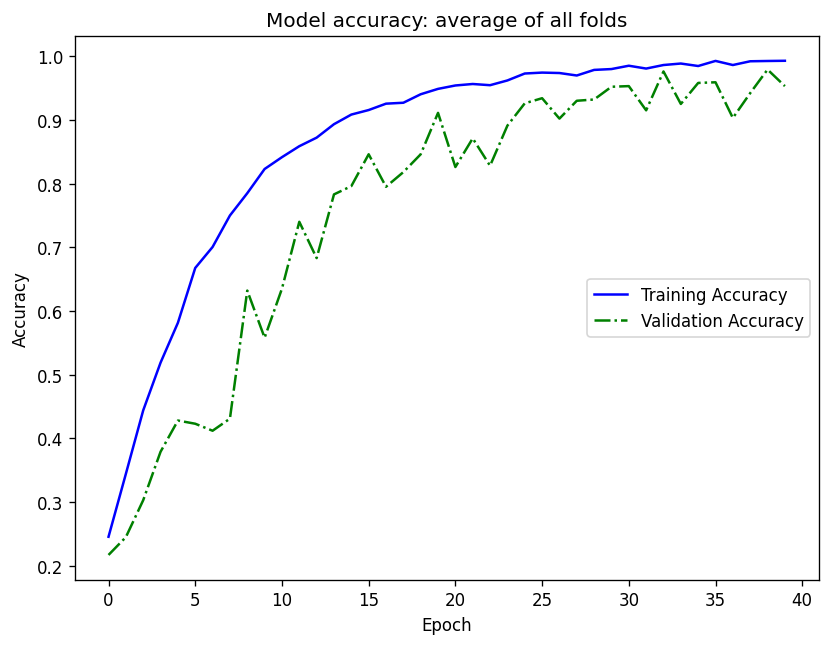

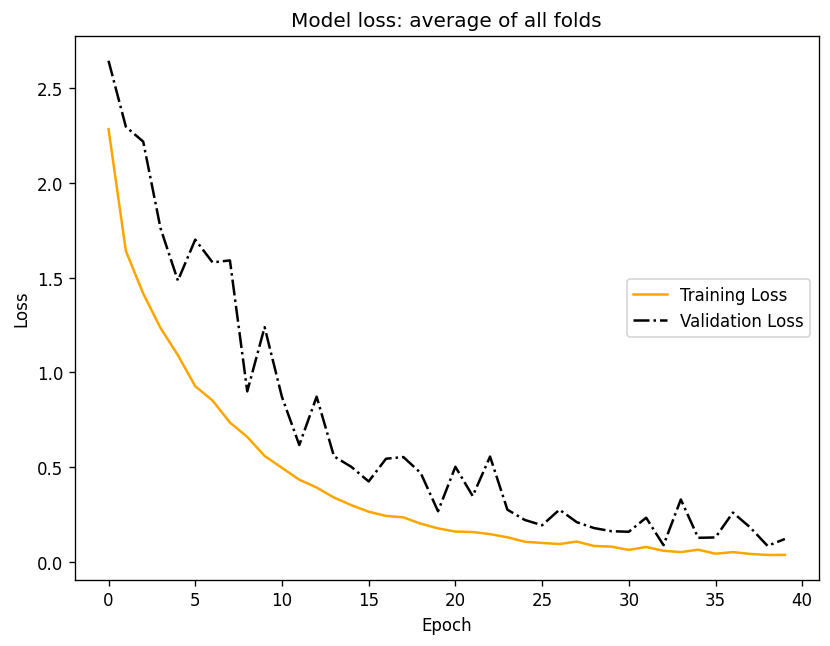

In [ ]:
# plot diagnostic learning curves, when dict history is saved without History object

def summarize_diagnostics(history, slug=""):
  # Plot training & validation accuracy values
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  plt.plot(history['accuracy'], 'b')
  plt.plot(history['val_accuracy'], 'g', linestyle="-.")
  plt.title('Model accuracy'+slug)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='center right')
  path = '/content/drive/My Drive/saveData/cardio/dataset1/history'
  if not os.path.exists(path):
    os.makedirs(path)
  plt.savefig(path+'/'+'Model Accuracy'+slug+'.png', bbox_inches='tight')
  # plt.savefig('Accuracy'+slug+'.png', bbox_inches='tight')
  plt.show()

  # Plot training & validation loss values
  figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='red')
  plt.plot(history['loss'], 'orange')
  plt.plot(history['val_loss'], 'black', linestyle="-.")
  plt.title('Model loss'+slug)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='center right')
  path = '/content/drive/My Drive/saveData/cardio/dataset1/history'
  if not os.path.exists(path):
    os.makedirs(path)
  plt.savefig(path+'/'+'Model Loss'+slug+'.png', bbox_inches='tight')
  # plt.savefig('Loss'+slug+'.png', bbox_inches='tight')
  plt.show()

#--------------------------------------------------------------------------- learning curves
# print(history.history.keys())
# summarize_diagnostics(history)
# summarize_diagnostics(load_history_all_fold[5])
summarize_diagnostics(avg_history, ": average of all folds")

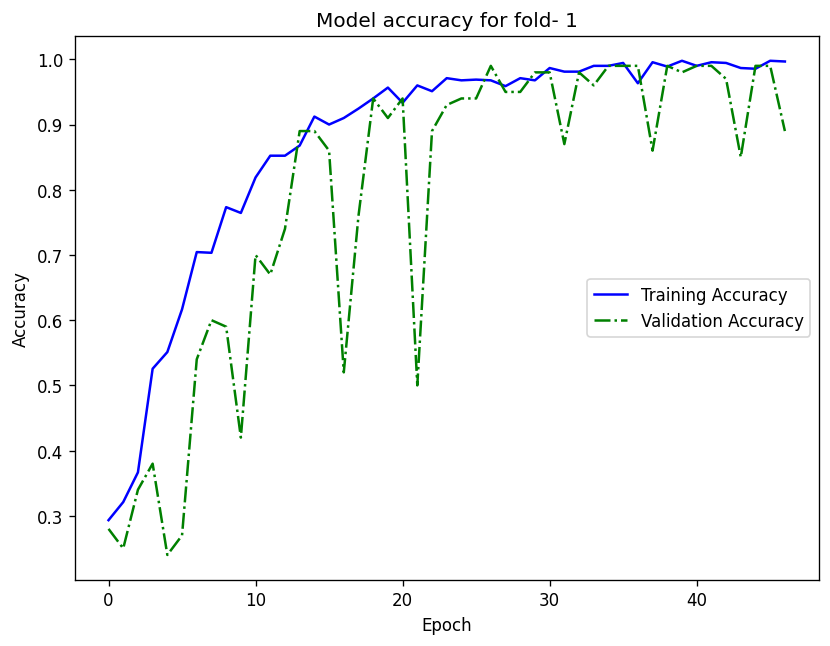

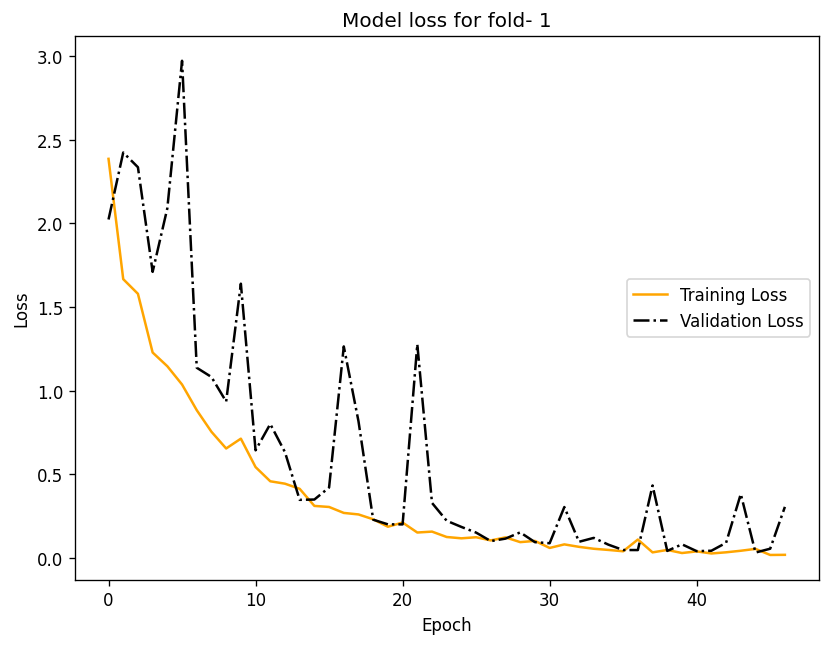

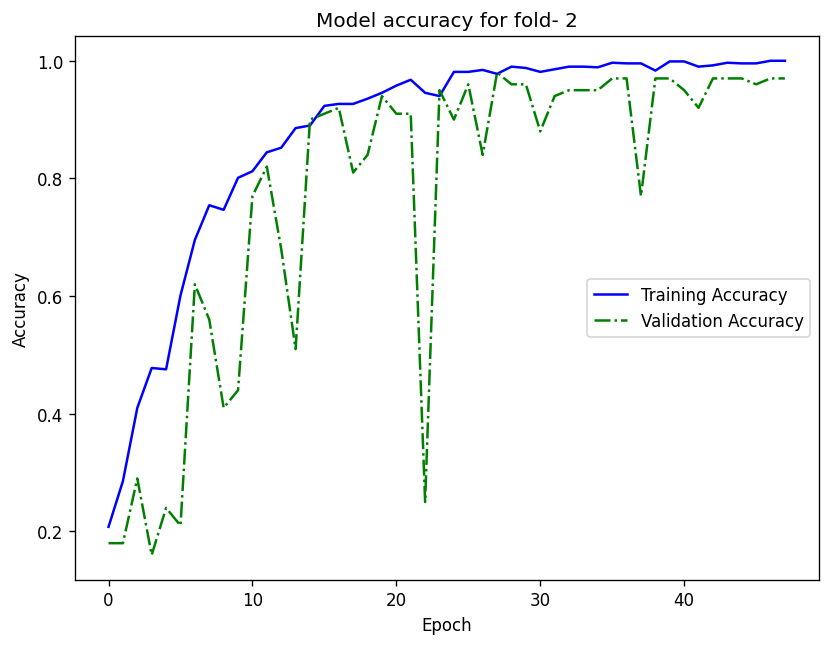

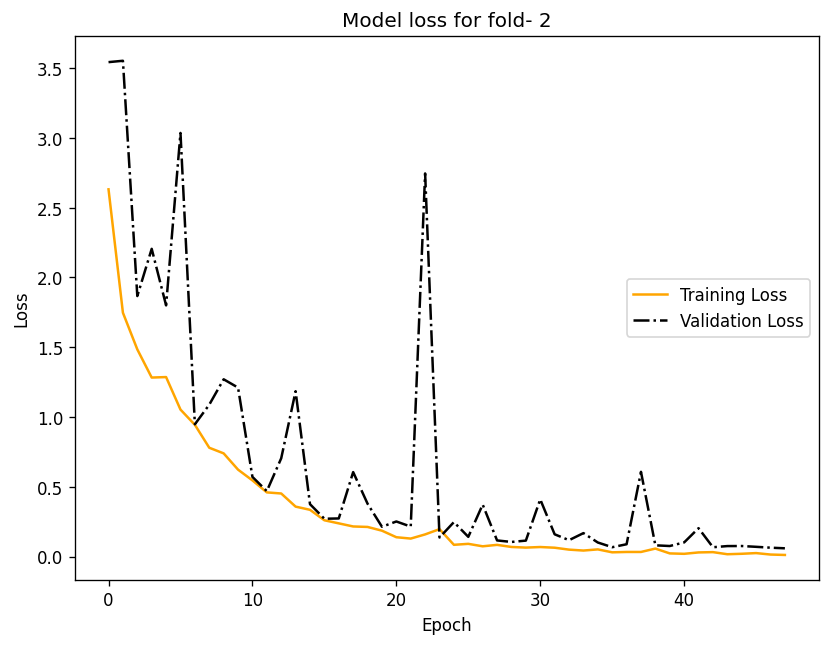

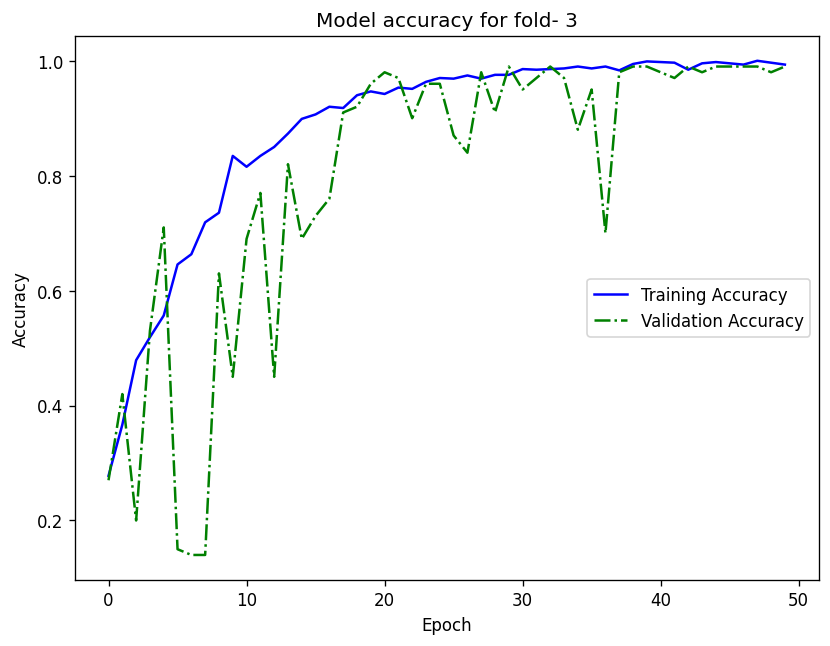

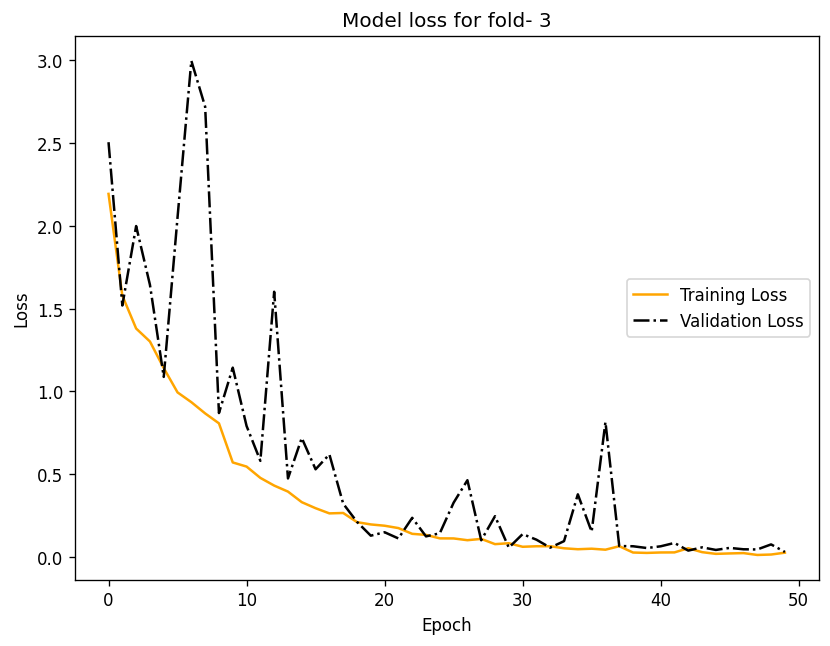

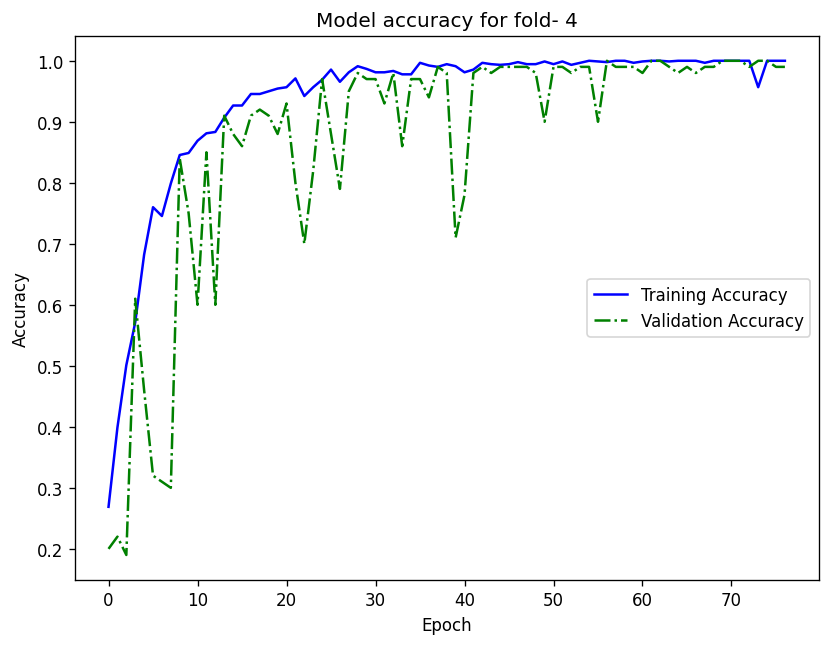

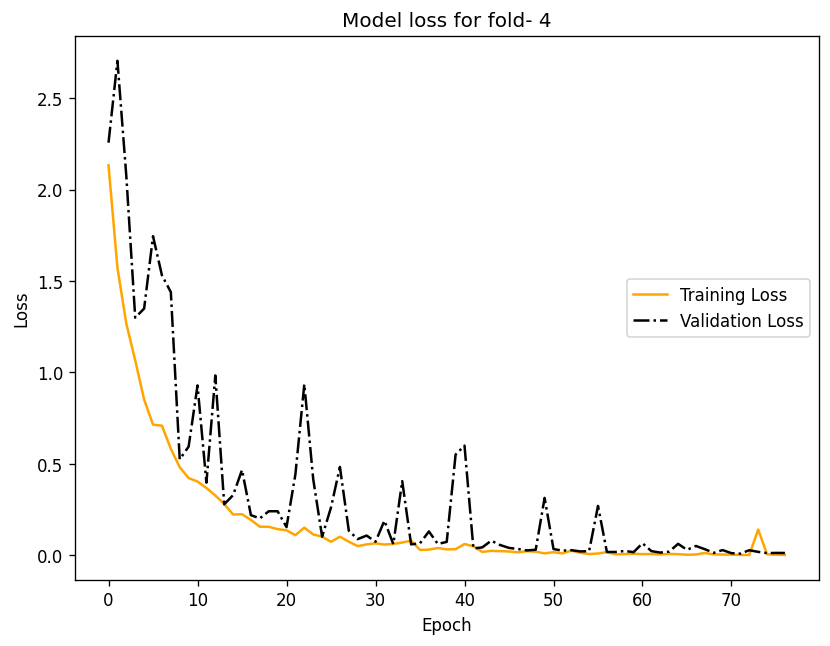

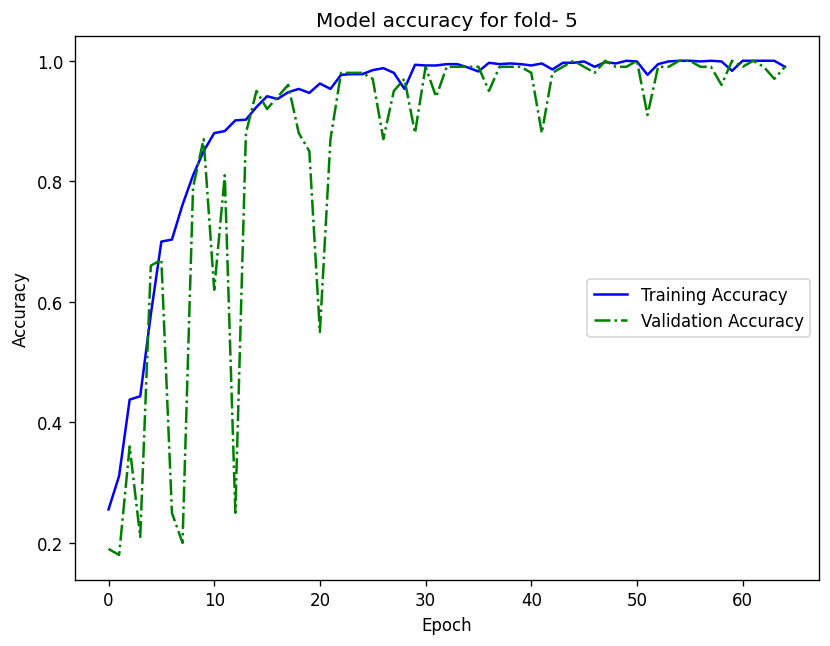

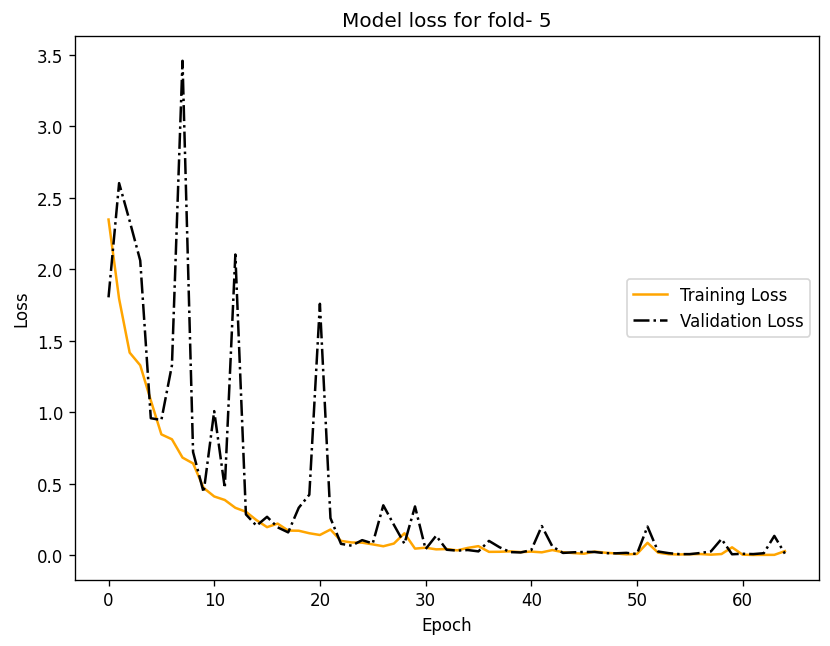

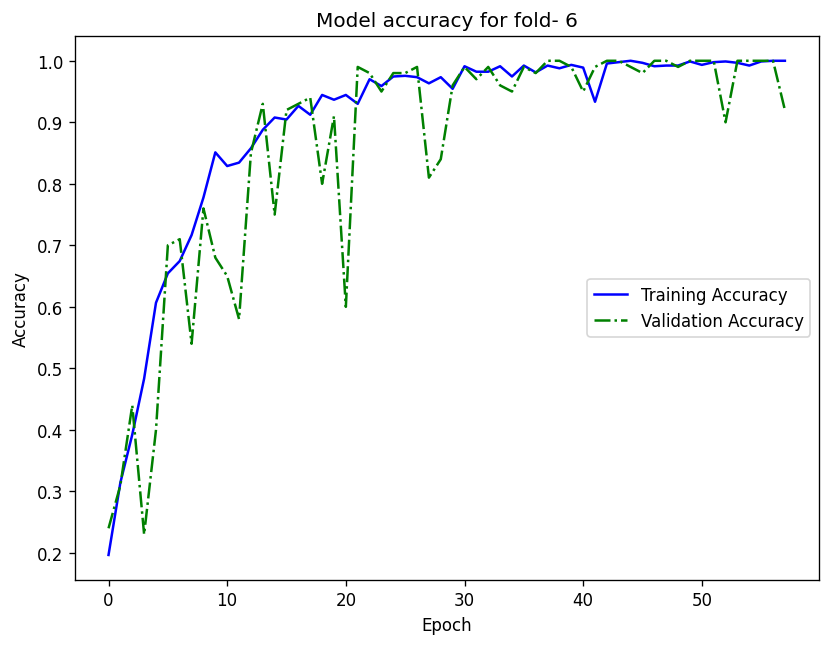

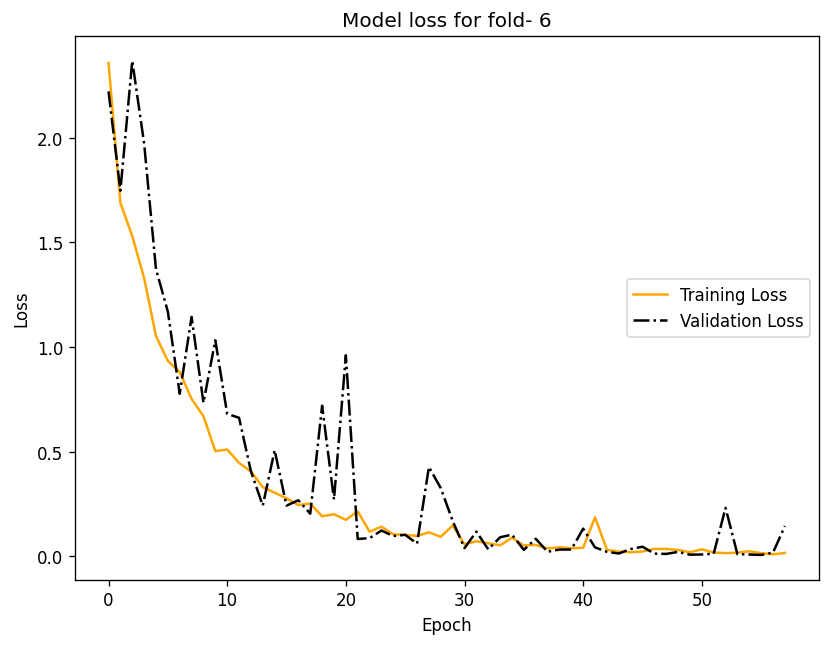

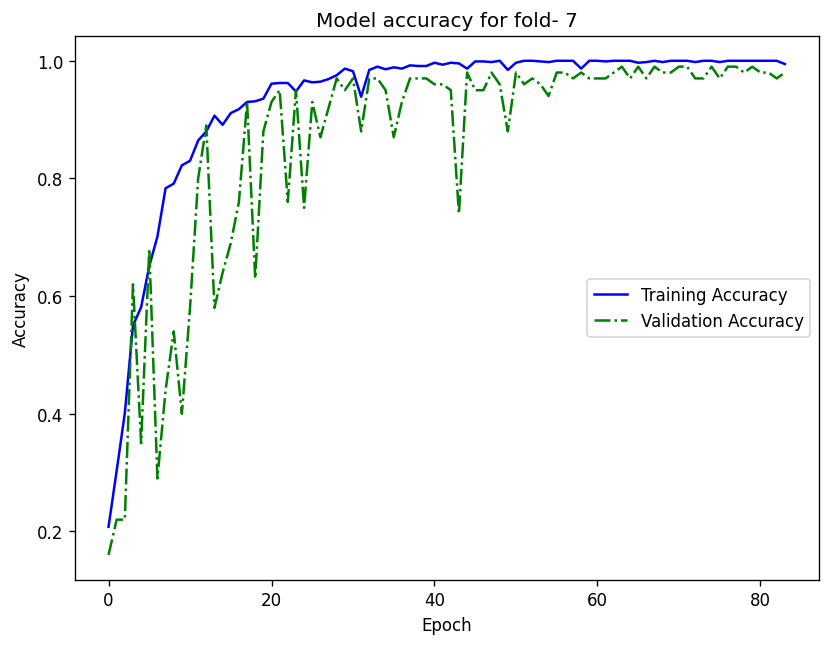

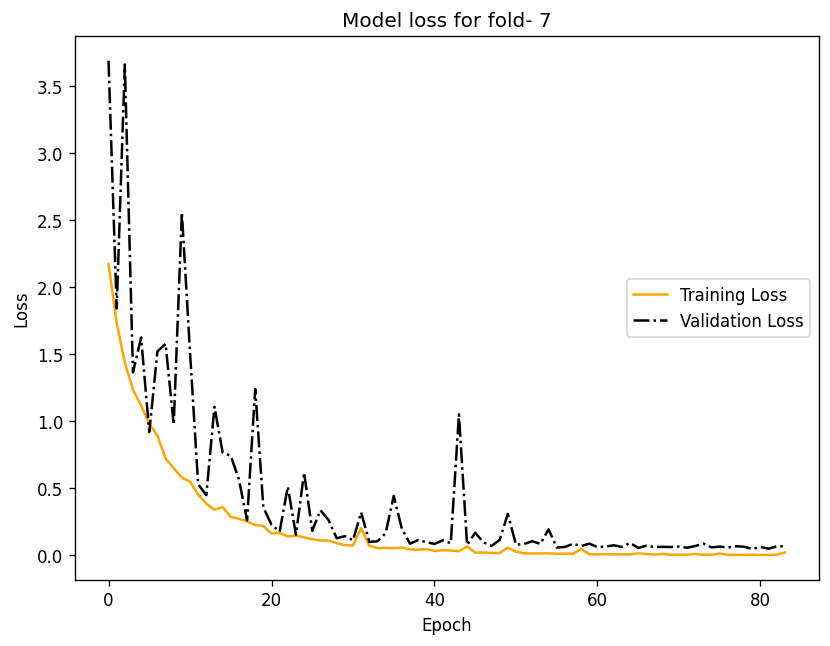

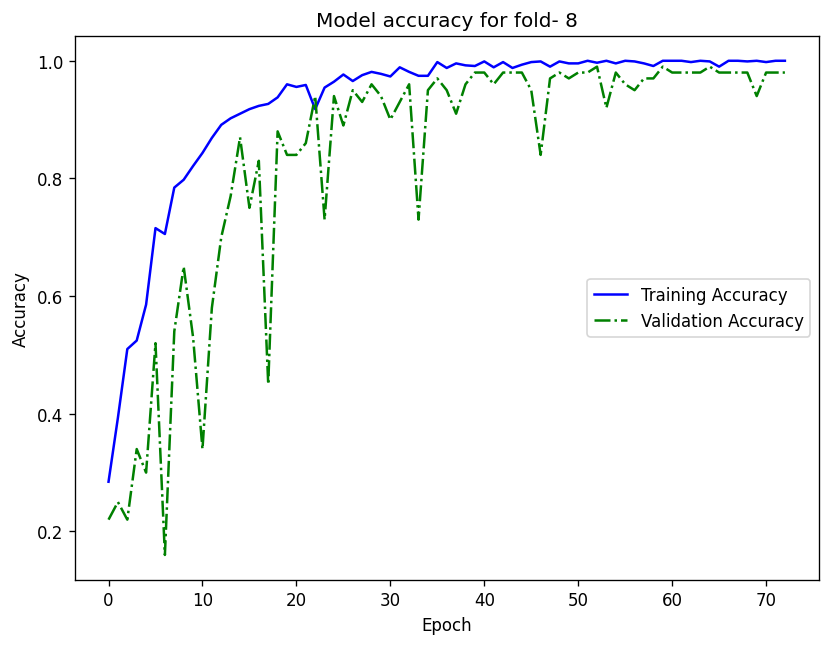

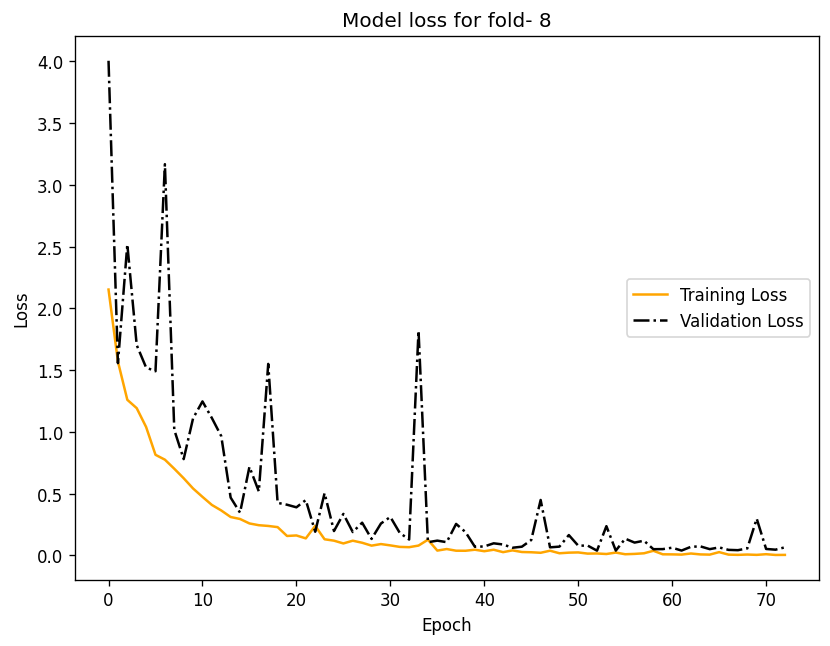

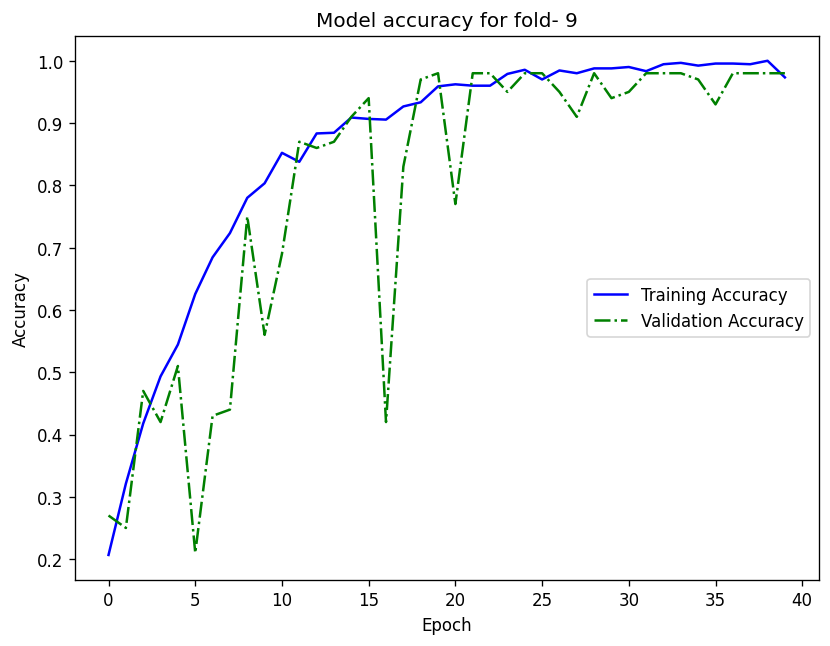

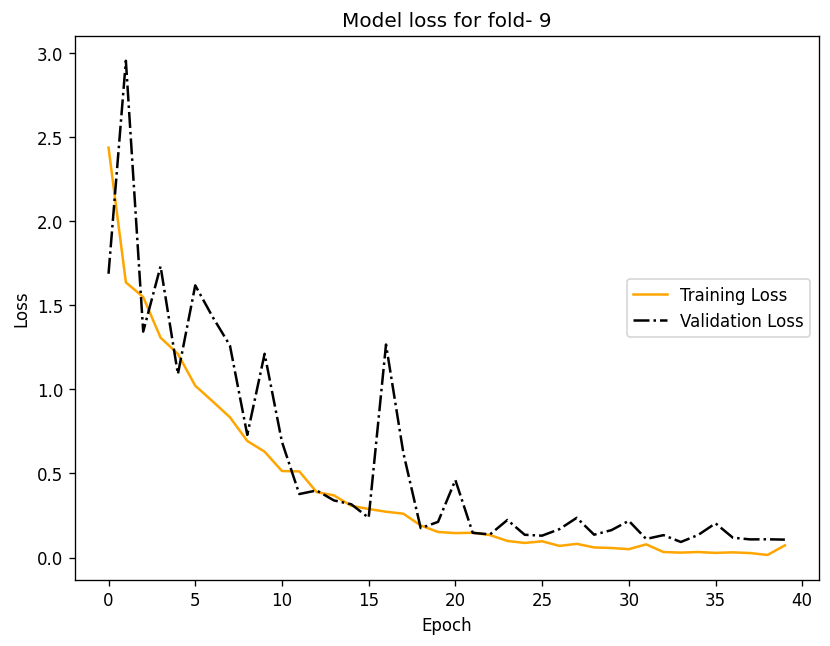

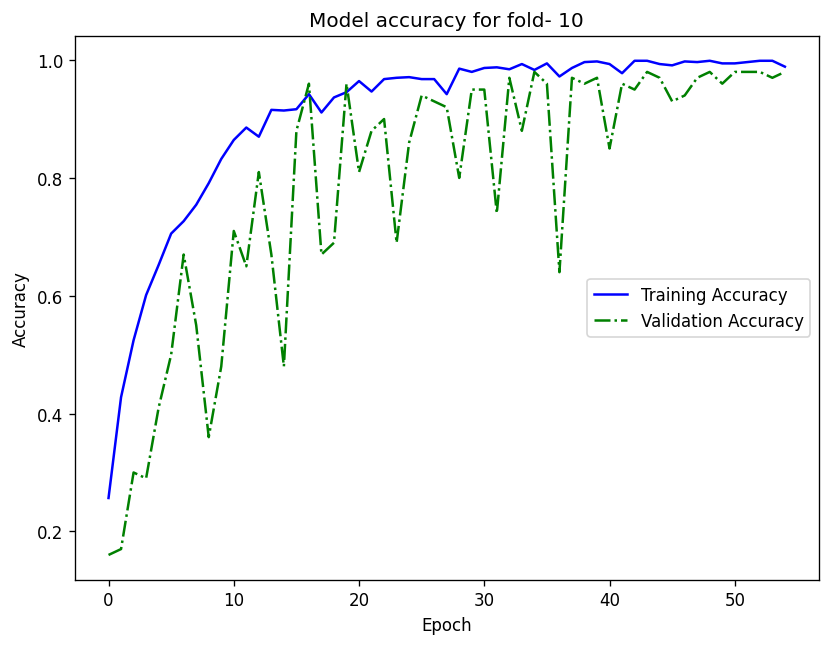

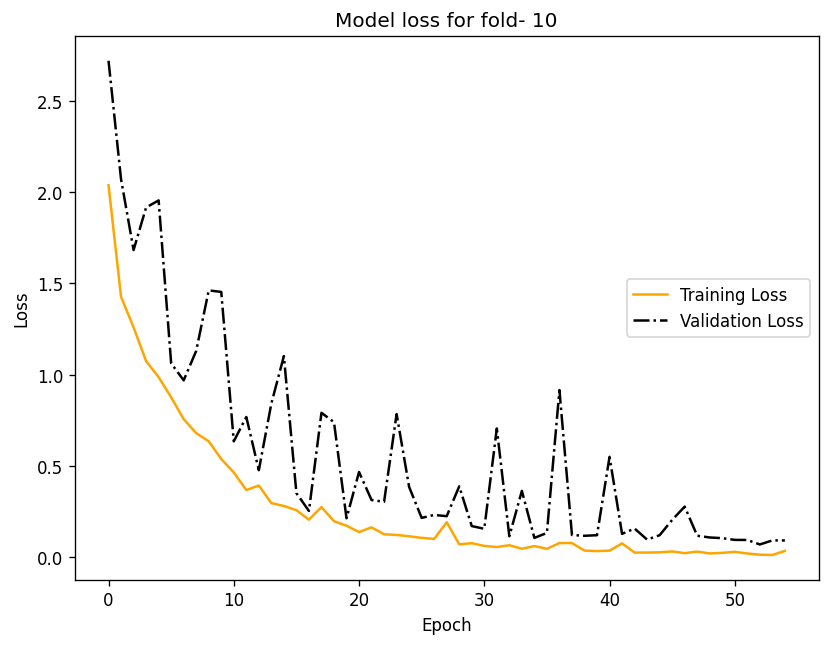

In [ ]:
# plotting history of each fold

for i in range(10):
  summarize_diagnostics(load_history_all_fold[i], ' for fold- '+str(i+1))